In [1]:
from catchment import create_catchment, netcdf_from_dict
import matplotlib.pyplot as plt
import numpy as np

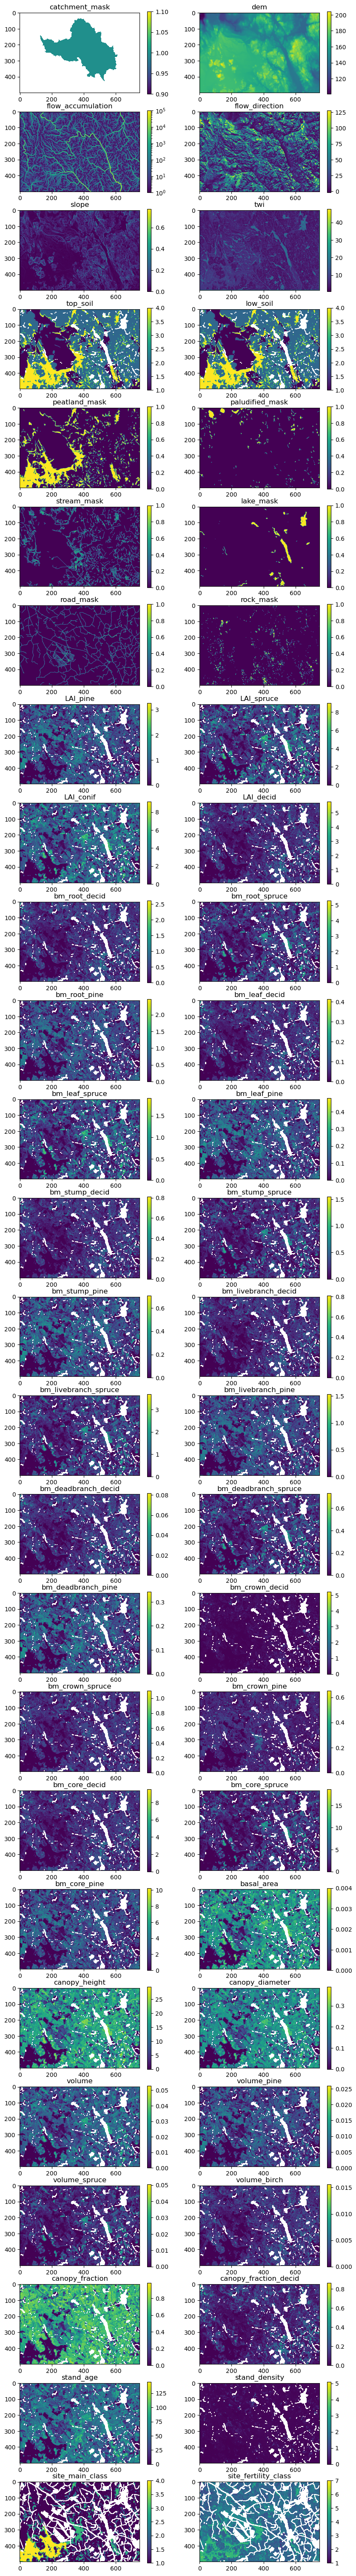

In [2]:
fpath = r'/scratch/project_2000908/nousu/GISPUTS/Kuivalake_Catchment/GIS_inputs/kuivajarvi/'
catch, units, meta = create_catchment(fpath, set_non_forest_as='null')

In [3]:
fpath = r'/scratch/project_2000908/nousu/GISPUTS/Kuivalake_Catchment/GIS_inputs/kuivajarvi/gisdata.nc'
nc = netcdf_from_dict(data=catch, units=units, meta=meta, out_fp=fpath)

In [4]:
import xarray as xr
data = xr.open_dataset(fpath)

In [5]:
data

<xarray.Dataset>
Dimensions:                (lat: 500, lon: 750)
Coordinates:
  * lat                    (lat) float64 6.865e+06 6.865e+06 ... 6.857e+06
  * lon                    (lon) float64 3.48e+05 3.48e+05 ... 3.6e+05 3.6e+05
Data variables: (12/53)
    catchment_mask         (lat, lon) float32 ...
    dem                    (lat, lon) float32 ...
    flow_accumulation      (lat, lon) float32 ...
    flow_direction         (lat, lon) float32 ...
    slope                  (lat, lon) float32 ...
    twi                    (lat, lon) float32 ...
    ...                     ...
    canopy_fraction_decid  (lat, lon) float32 ...
    stand_age              (lat, lon) float32 ...
    stand_density          (lat, lon) float32 ...
    site_main_class        (lat, lon) float32 ...
    site_fertility_class   (lat, lon) float32 ...
    fra_land_class         (lat, lon) float32 ...
Attributes:
    description:  GIS dataset
    history:      created 2023-12-13 13:26:59
    source:       MML, GTK, LUKE

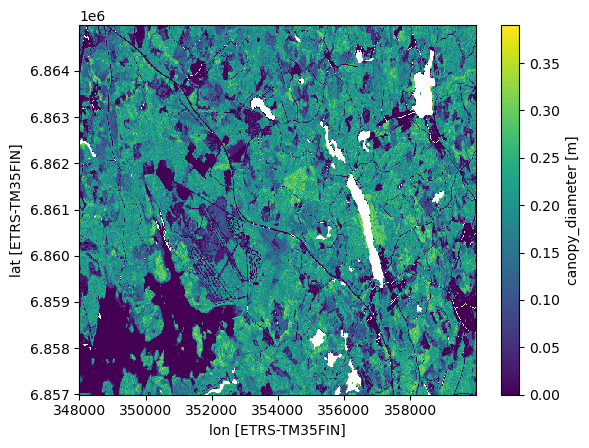

In [13]:
data['canopy_diameter'].plot()

In [75]:
def tree_density(diameter, ba):
    '''
    in:
    diameter = tree diameter
    ba = basal area
    out:
    no_trees = number of trees
    '''
    # uniform distribution for comparison
    EPS = np.finfo(float).eps
    tree_ba= np.pi * (0.5*diameter)**2 # the area of an average tree m2
    no_trees = ba / (tree_ba + EPS) # how many trees per total basal area
    # clearcuts cause noise; set n to zero
    no_trees[diameter<0.01] = 0.0
    return no_trees

In [55]:
catch['canopy_diameter'][100,100]

0.26

In [64]:
np.pi * (0.005*(catch['canopy_diameter'][100,100]*1e2))**2

0.05309291584566751

In [59]:
catch['basal_area'][100,100]*1e4

30.0

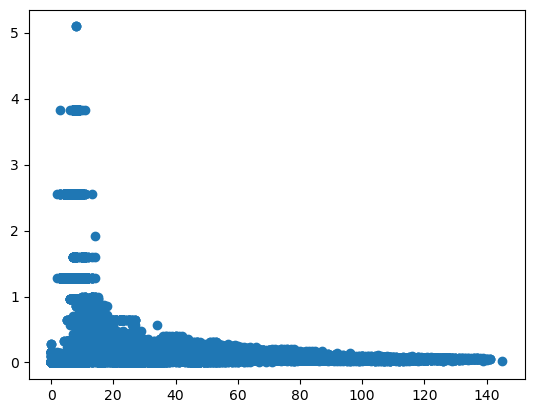

In [76]:
ba=catch['basal_area']
diameter=catch['canopy_diameter']

N = tree_density(diameter=diameter, ba=ba).flatten()
age = catch['stand_age'].flatten()

plt.scatter(age, N)